<a href="https://colab.research.google.com/github/ChristianConchari/Computer-Vision-Notes/blob/master/Tutorial_10_Corner_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 10: Corner Detection

Welcome to the 10th tutorial!

A corner can be located by following these steps:

- Calculate the gradient for a small window of the image, using sobel-x and sobel-y operators (without applying binary thesholding).
- Use vector addition to calculate the magnitude and direction of the total gradient from these two values.

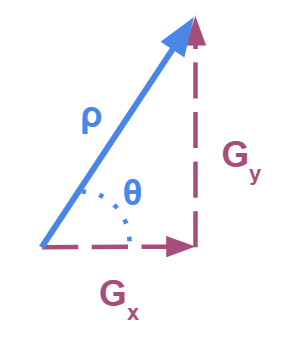

- Apply this calculation as you slide the window across the image, calculating the gradient of each window. When a big variation in the direction & magnitude of the gradient has been detected - a corner has been found!




### Import resources and display the image

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


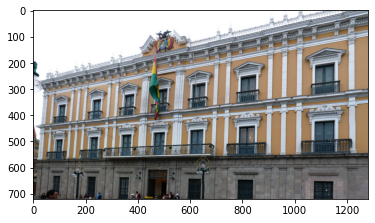

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab import files as FILE
import os, requests

%matplotlib inline

# Download image from the Internet
img_data = requests.get("https://www.opinion.com.bo/media/opinion/images/2019/12/28/2019122811372687362.jpg" , verify=False).content
with open('2019122811372687362.jpg', 'wb') as handler:
    handler.write(img_data)

# Read in the image
image = cv2.imread('2019122811372687362.jpg')

# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)

## Harris Corner Detector in OpenCV
OpenCV has the function cv2.cornerHarris() for this purpose. Its arguments are :

- img - Input image, it should be grayscale and float32 type.

- blockSize - It is the size of neighbourhood considered for corner detection

- ksize - Aperture parameter of Sobel derivative used.

- k - Harris detector free parameter in the equation.

## Detect corners

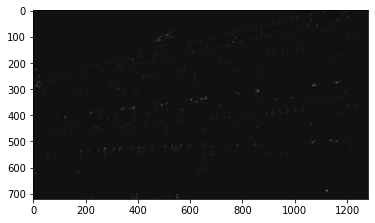

In [ ]:
# Convert to grayscale
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)
gray = np.float32(gray)

# Detect corners 
dst = cv2.cornerHarris(gray, 2, 3, 0.04)

# Dilate corner image to enhance corner points
dst = cv2.dilate(dst,None)

plt.imshow(dst, cmap='gray')

## Extract and display strong corners

(720, 1280)


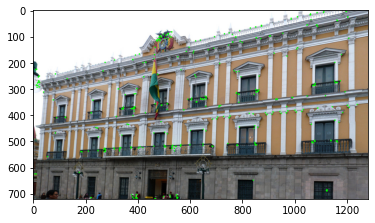

In [ ]:
# Once the potential corners were found, it's important to 
# define a threshold for extracting strong corners
# This value vary depending on the image and how many corners you want to detect
# Try changing this free parameter, 0.1, to be larger or smaller ans see what happens
threshold = 0.1*dst.max()

# Create an image copy to draw corners on
corner_image = np.copy(image_copy)

# Iterate through all the corners and draw them on the image (if they pass the threshold)
for j in range(0, dst.shape[0]):
    for i in range(0, dst.shape[1]):
        if(dst[j,i] > threshold):
            # image, center pt, radius, color, thickness
            cv2.circle( corner_image, (i, j), 1, (0,255,0), 1)

plt.imshow(corner_image)

# Exerice 1: 
In addition to the cv2.cornerHarris() function, there is a procedure to polish the corners found named SubPixel Accuracy. Implement SubPixel Accuracy with a different image and describe its procedure. Then, explain What are the advantages of using SubPixel Accuracy? How important would be to include SubPixel in an Computer Vision project? 


## SOLUTION:

### Import resources to workspace

First we import the images and we will convert them to grayscale to be able to process them.

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


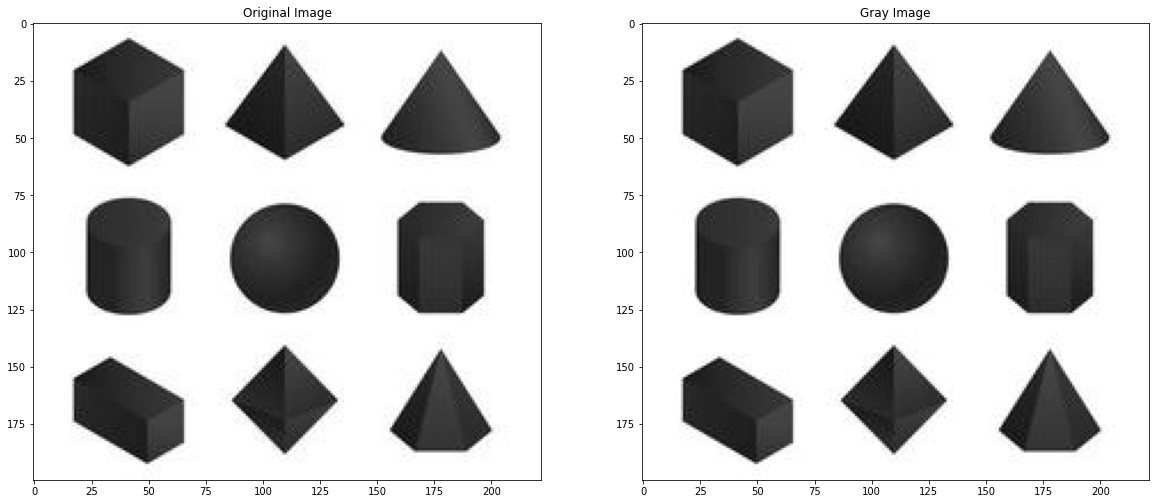

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab import files as FILE
import os, requests

%matplotlib inline

# Download image from the Internet
img_data = requests.get("https://static.vecteezy.com/system/resources/thumbnails/001/234/433/small/assorted-3d-black-geometric-shapes.jpg" , verify=False).content

with open('2019122811372687362.jpg', 'wb') as handler:
    handler.write(img_data)

# Read in the image
image = cv2.imread('2019122811372687362.jpg')

# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

# Convert to grayscale
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)
gray = np.float32(gray)

f, (ax1,ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title("Original Image")
ax1.imshow(image_copy)
ax2.set_title("Gray Image")
ax2.imshow(gray, cmap='gray')
plt.show()

### Detect corners 

We will use Harris's corner detection algorithm to identify the corners in our image. Once we obtain these characteristics, we will pass them through a thresholding to binarize them.

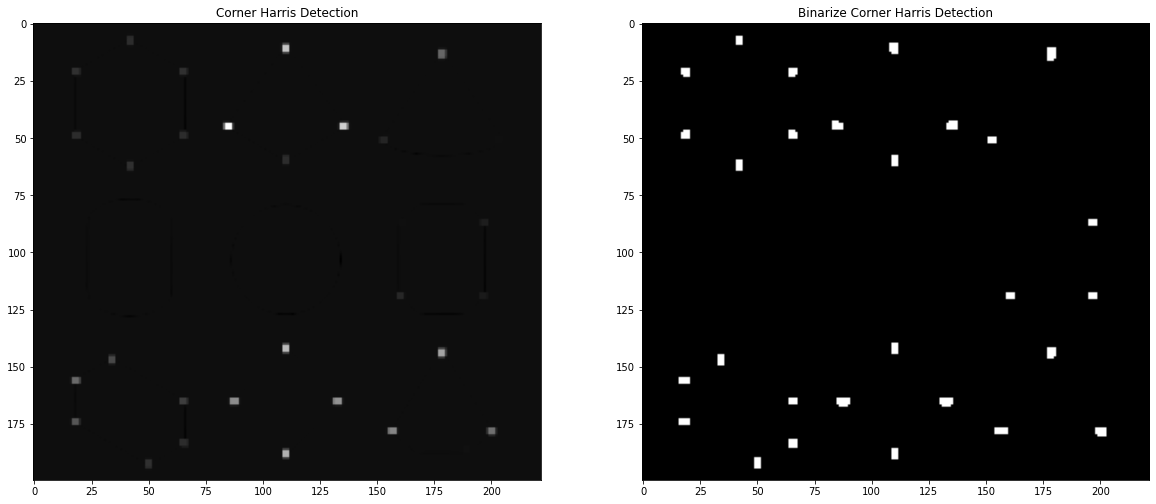

In [ ]:
# Detect corners 
dst = cv2.cornerHarris(gray, 2, 3, 0.04)

# Dilate corner image to enhance corner points
dst = cv2.dilate(dst,None)

dst1 = np.copy(dst)
# Binarize the image 
ret, dst = cv2.threshold(dst,0.01*dst.max(),255,0)

# Convert the image to 8 bit unsigned integer
dst = np.uint8(dst)

f, (ax1,ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title("Corner Harris Detection")
ax1.imshow(dst1, cmap='gray')
ax2.set_title("Binarize Corner Harris Detection")
ax2.imshow(dst, cmap='gray')
plt.show()

### Extract and display strong corners using SubPixel Accuracy

To increase the accuracy of our corner detection, we use the sub-pixel accuracy algorithm. In some cases this can be useful when we really want to know the exact position of a corner in an image, which can be useful for example in 3D reconstruction of images.

x:177.75668334960938, y:12.105916976928711
x:178.43478260869566, y:13.391304347826088


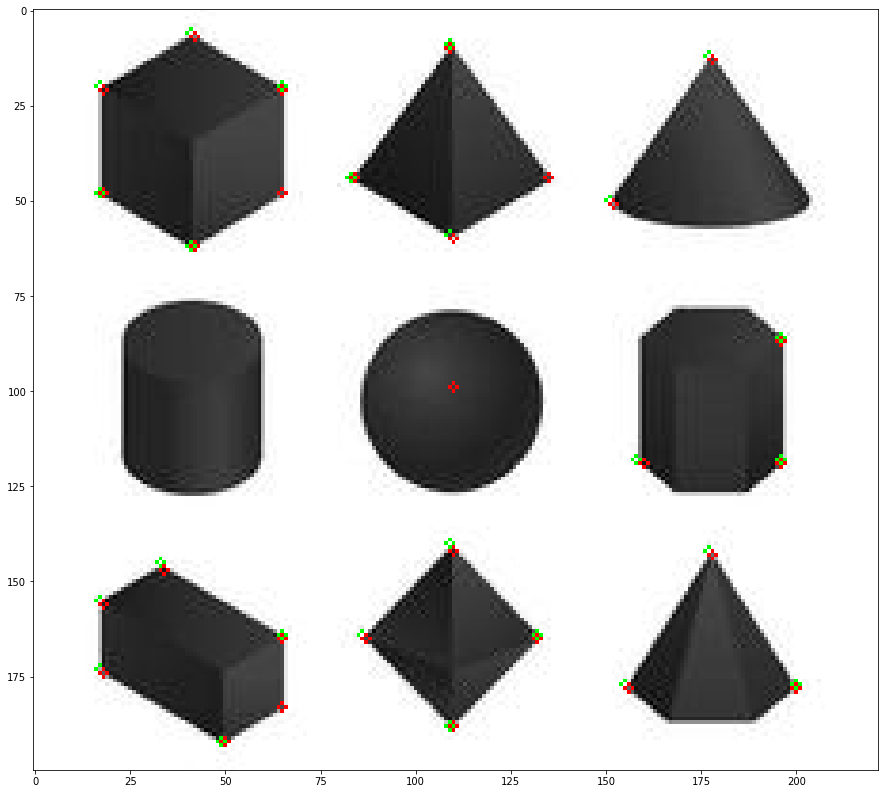

In [ ]:
# Copy the image
img = np.copy(image_copy)

# Find the centroids
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)
# Define the corners
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)

print(f'x:{corners[3][0]}, y:{corners[3][1]}')
print(f'x:{centroids[3][0]}, y:{centroids[3][1]}')


for j in range(0, len(corners)):
  cv2.circle( img, (corners[j][0],corners[j][1]), 1, (0,255,0), 1) # GREEN CIRCLES
  cv2.circle( img, (np.float32(centroids[j][0]),np.float32(centroids[j][1])), 1, (255,0,0), 1) # RED CIRCLES
  

plt.figure(figsize=(160,14))
plt.imshow(img,cmap='gray')

As can be seen in the image above, good results were achieved in both cases. But if we analyze some corners more closely, we will notice that the red circle, which corresponds to the Harris detection, is slightly out of phase with the green circle, corresponding to the Harris detection + Sub-pixel accuracy; this is evidence of the just mentioned increase in precision.

To analyze in more detail we will cut one of the corners.

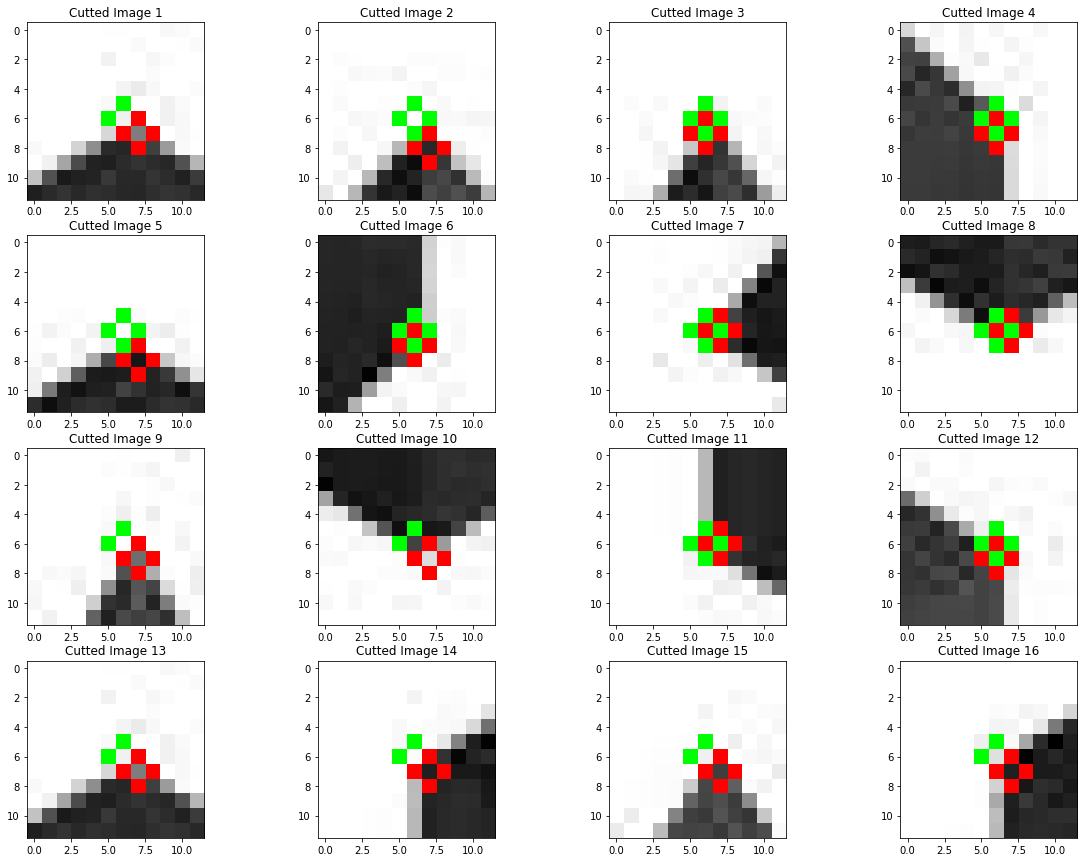

In [ ]:
# increment to cut the images
a = 6
cuted_images=[]
for i in range(len(corners)):
  cuted_images.append(img[int(corners[i][1])-a:int(corners[i][1])+a,int(corners[i][0])-a:int(corners[i][0])+a])

f, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8),
    (ax9,ax10,ax11,ax12),(ax13,ax14,ax15,ax16)) = plt.subplots(4, 4, figsize=(20,15))

ax1.set_title("Cutted Image 1")
ax1.imshow(cuted_images[1])
ax2.set_title("Cutted Image 2")
ax2.imshow(cuted_images[16])
ax3.set_title("Cutted Image 3")
ax3.imshow(cuted_images[2])
ax4.set_title("Cutted Image 4")
ax4.imshow(cuted_images[13])
ax5.set_title("Cutted Image 5")
ax5.imshow(cuted_images[18])
ax6.set_title("Cutted Image 6")
ax6.imshow(cuted_images[15])
ax7.set_title("Cutted Image 7")
ax7.imshow(cuted_images[6])
ax8.set_title("Cutted Image 8")
ax8.imshow(cuted_images[12])
ax9.set_title("Cutted Image 9")
ax9.imshow(cuted_images[17])
ax10.set_title("Cutted Image 10")
ax10.imshow(cuted_images[11])
ax11.set_title("Cutted Image 11")
ax11.imshow(cuted_images[8])
ax12.set_title("Cutted Image 12")
ax12.imshow(cuted_images[5])
ax13.set_title("Cutted Image 13")
ax13.imshow(cuted_images[1])
ax14.set_title("Cutted Image 14")
ax14.imshow(cuted_images[4])
ax15.set_title("Cutted Image 15")
ax15.imshow(cuted_images[3])
ax16.set_title("Cutted Image 16")
ax16.imshow(cuted_images[19])

plt.show()

As we can see in the cropped images, the green circles are closer to the real corner in the image, in this way the increase in accuracy is demonstrated using Subpixel accuracy.

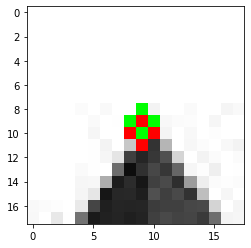

In [ ]:
plt.imshow(img[int(corners[2][1])-9:int(corners[2][1])+9,int(corners[2][0])-9:int(corners[2][0])+9])

As mentioned above, the green circle should represent a closer approximation to the actual corner of the figure in the image. It is clear that factors such as noise, or low image resolution can influence some erroneous results, which can also be seen in cropped images.